<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_388_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week #1**

### **Activity #1**

The TecQuipment vibration analyser consists of:



* A rigid beam of length L
* Left end: pinned support (no vertical translation, free rotation)
* Right end: connected to the frame through a linear spring of stiffness k
* An unbalanced motor mounted at the mid-span of the beam
* Small-amplitude vibrations about the static equilibrium position


The beam is assumed to be:

* Rigid
* Of mass $\ m_b $
* With mass moment of inertia $I_b$ about its center of mass

The motor has:
* Mass $m_m$
* Produces a harmonic excitation force due to imbalance

To capture the first two dominant modes, we select:
1. $q_1$​(t)=θ(t)  : Small rotation of the rigid beam about the pinned end
2. $q_2$​(t)=y(t)  : Vertical displacement of the motor at mid-span

These two coordinates represent:

* A global rotational mode

* A local translational mode due to the motor inertia

Thus, the system is modeled as a 2-DOF system.
	​

For small angular motion:
* Vertical displacement at the right end:  
$y_R$​=Lθ	​
* Vertical displacement at the motor location (mid-span):
$y_M$​=$\frac{L}{2}$ ​θ+y

(a) Beam kinetic energy

The beam undergoes pure rotation about the pinned end:
$ T_b = \frac{1}{2} I_O \dot{\theta}^2 $

Using parallel-axis theorem:
$I_O = I_b + m_b \left(\frac{L}{2}\right)^2$

(b) Motor kinetic energy

The motor undergoes vertical translation:

$T_m = \frac{1}{2}\, m_m \left( \dot{y}_M \right)^2$

$\dot{y}_M = \frac{L}{2}\,\dot{\theta} + \dot{y}$

$T_m = \frac{1}{2}\, m_m \left( \frac{L}{2}\,\dot{\theta} + \dot{y} \right)^2$

(c) Total kinetic energy

$T = T_b + T_m$

Potential Energy of the System;

Only the spring stores potential energy.

Spring extension at the right end:
δ=Lθ

Spring potential energy:
$V = \frac{1}{2}\,k\,(L\theta)^2$

Lagrange’s Equations;

Using generalized coordinates

$q_1 = \theta, \qquad q_2 = y$

$\frac{d}{dt}\!\left( \frac{\partial T}{\partial \dot{q}_i} \right)
- \frac{\partial T}{\partial q_i}
+ \frac{\partial V}{\partial q_i}
= Q_i$


The unbalanced motor produces a harmonic force:

$F(t) = m_e e \,\omega^{2}\sin(\omega t)$

This force acts vertically at the motor location, contributing only to y:

$Q_{\theta} = 0$

$Q_{y} = F(t)$

After applying Lagrange’s equations:

$\begin{bmatrix} M_{11} & M_{12} \\ M_{21} & M_{22} \end{bmatrix} \begin{bmatrix} \ddot{\theta} \\ \ddot{y} \end{bmatrix} + \begin{bmatrix} K_{11} & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ F(t) \end{bmatrix}$

Where:

$M_{11} = I_{0} + m_m (\frac{L}{2})^{2}$

$M_{12} = M_{21} = m_m(\frac{L}{2})$

$M_{22}​=m_m​$

$K_{11}=kL^2$

This 2-DOF model captures the first two dominant vibration modes of the TecQuipment vibration analyser.


## **Activity #2**

From Activity #1, the 2-DOF system is described by:

$
\mathbf{M}
=
\begin{bmatrix}
I_{0} + m_m \left(\dfrac{L}{2}\right)^{2} & m_m \left(\dfrac{L}{2}\right) \\
m_m \left(\dfrac{L}{2}\right) & m_m
\end{bmatrix}
$

$
\mathbf{K}
=
\begin{bmatrix}
k L^{2} & 0 \\
0 & 0
\end{bmatrix}
$

$I_O = I_b + m_b(L/2)^2
$

$m_m$= motor mass,
$𝑚_𝑏$= beam mass,
k = spring stiffness

We assume viscous damping, primarily at the spring/beam supports.

Let’s assume a diagonal damping matrix:

$C=\begin{bmatrix}c_{\theta}&0\\0&c_{y}\end{bmatrix}$

$c_θ$= damping associated with beam rotation

$c_y$= damping associated with motor vertical motion

For small damping (typical of this setup), off-diagonal terms are negligible.

Solve the eigenvalue problem for the undamped system:

$\text{det}(K - \omega^2 M) = 0$

Substituting M and K gives a quadratic in $\omega^2$.

Solving it gives $ω_1$ and $ω_2$, the first two natural frequencies (rad/s).

For each $ω_i$, solve:
$\left( \mathbf{K} - \omega_i^{2}\,\mathbf{M} \right)\boldsymbol{\Phi}_i = \mathbf{0}$

$Φ_i$= i-th mode shape vector

Normalize $Φ_i$

This gives $Φ_1$ and $Φ_2$.

For each mode i:

$\zeta_i = \frac{\boldsymbol{\Phi}_i^{\mathsf{T}} \mathbf{C} \boldsymbol{\Phi}_i}
{2\,\omega_i\,\boldsymbol{\Phi}_i^{\mathsf{T}} \mathbf{M} \boldsymbol{\Phi}_i}$

Step by step:

1. Compute modal mass:
$M_i = \Phi_i^T M \Phi_i$

2. Compute modal damping:
$C_i = \Phi_i^T C \Phi_i$

3. Compute damping ratio:
$\zeta_i = \frac{C_i}{2M_i\omega_i}$

This gives $ζ_1$ and $ζ_2$.


	​


	​









**#Activity 3**

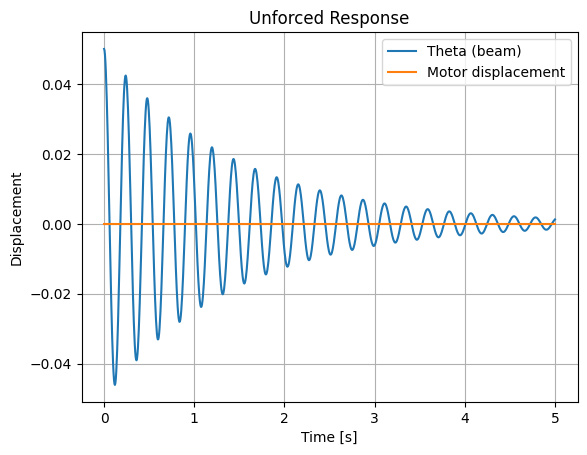

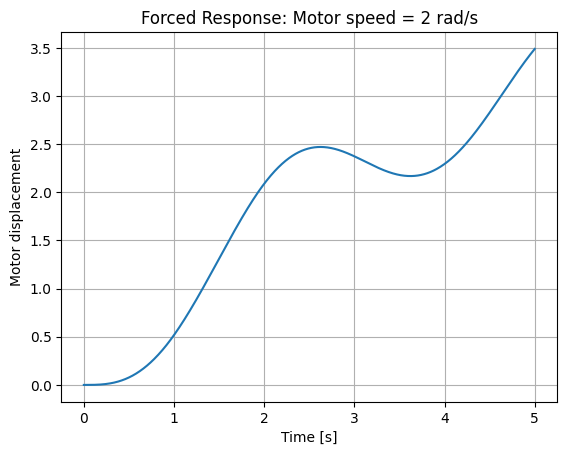

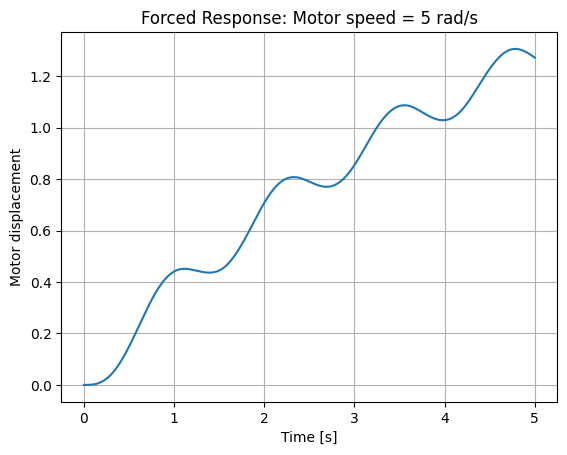

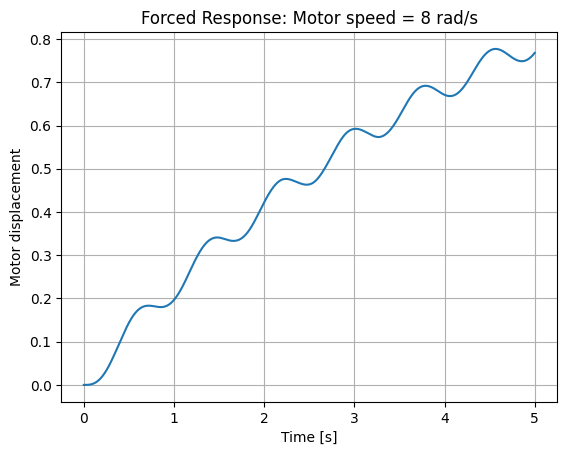

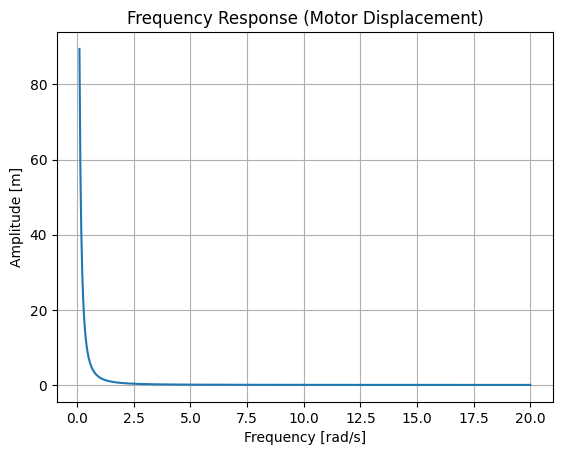

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import solve_ivp

# -------------------------------
# 1. Define system parameters
# -------------------------------
L = 1.0           # beam length (m)
m_b = 2.0         # beam mass (kg)
I_b = 0.1         # beam inertia (kg.m^2)
m_m = 0.5         # motor mass (kg)
k = 500.0         # spring stiffness (N/m)
c_theta = 1.0     # rotational damping
c_y = 0.1         # translational damping
theta0 = 0.05     # initial rotation (rad)

# Mass matrix
M = np.array([[I_b + m_b*(L/2)**2 + m_m*(L/2)**2, m_m*L/2],
              [m_m*L/2, m_m]])

# Stiffness matrix
K = np.array([[k*L**2, 0],
              [0, 0]])

# Damping matrix
C = np.array([[c_theta, 0],
              [0, c_y]])

# -------------------------------
# 2. Unforced response
# -------------------------------
def unforced(t, q):
    theta, y, theta_dot, y_dot = q
    dqdt = [theta_dot,
            y_dot,
            (-K[0,0]*theta - K[0,1]*y - C[0,0]*theta_dot - C[0,1]*y_dot)/M[0,0],
            (-K[1,0]*theta - K[1,1]*y - C[1,0]*theta_dot - C[1,1]*y_dot)/M[1,1]]
    return dqdt

q0 = [theta0, 0, 0, 0]
t_span = (0, 5)
t_eval = np.linspace(0, 5, 1000)
sol = solve_ivp(unforced, t_span, q0, t_eval=t_eval)

plt.figure()
plt.plot(sol.t, sol.y[0], label='Theta (beam)')
plt.plot(sol.t, sol.y[1], label='Motor displacement')
plt.title('Unforced Response')
plt.xlabel('Time [s]')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)

# -------------------------------
# 3. Forced response
# -------------------------------
# Example three motor speeds
omega_vals = [2, 5, 8]  # rad/s (example values)
F_amp = 1.0              # amplitude of forcing (N)

for omega in omega_vals:
    def forced(t, q):
        theta, y, theta_dot, y_dot = q
        F = F_amp * np.sin(omega * t)
        dqdt = [theta_dot,
                y_dot,
                (-K[0,0]*theta - C[0,0]*theta_dot)/M[0,0],
                (-K[1,1]*y - C[1,1]*y_dot + F)/M[1,1]]
        return dqdt

    sol = solve_ivp(forced, t_span, [0,0,0,0], t_eval=t_eval)
    plt.figure()
    plt.plot(sol.t, sol.y[1])
    plt.title(f'Forced Response: Motor speed = {omega} rad/s')
    plt.xlabel('Time [s]')
    plt.ylabel('Motor displacement')
    plt.grid(True)

# -------------------------------
# 4. Frequency response
# -------------------------------
freqs = np.linspace(0.1, 20, 500)
H = []

for omega in freqs:
    # Solve (K - omega^2*M + j*omega*C) q = F
    A = -omega**2 * M + 1j*omega*C + K
    F = np.array([0, F_amp])
    q = np.linalg.solve(A, F)
    H.append(abs(q[1]))  # motor displacement amplitude

plt.figure()
plt.plot(freqs, H)
plt.title('Frequency Response (Motor Displacement)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [m]')
plt.grid(True)
plt.show()


# **Week #2**

### **Activity #4**


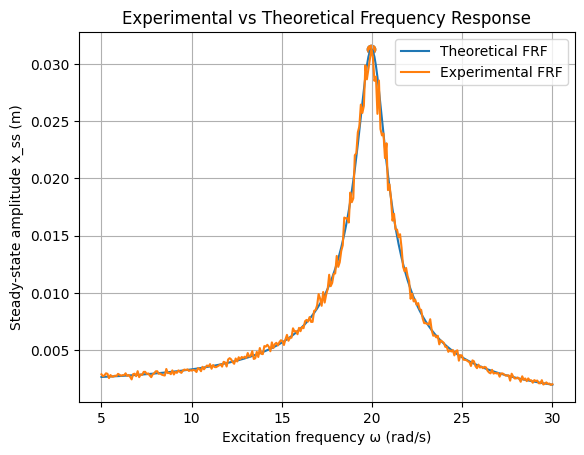

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example system parameters
m = 1.0          # equivalent mass (kg)
k = 400.0        # equivalent stiffness (N/m)
zeta = 0.04      # damping ratio
F0 = 1.0         # force amplitude (N)

# Natural frequencies
omega_n = np.sqrt(k/m)
omega_d = omega_n * np.sqrt(1 - zeta**2)

# Frequency range
omega = np.linspace(5, 30, 300)

# Theoretical frequency response
x_theory = (F0/m) / np.sqrt((omega_n**2 - omega**2)**2 +
                            (2*zeta*omega_n*omega)**2)

# Simulated experimental data
np.random.seed(0)
x_exp = x_theory * (1 + 0.05*np.random.randn(len(x_theory)))

# Find resonance values
idx_exp = np.argmax(x_exp)
omega_d_exp = omega[idx_exp]
x_ss_max_exp = x_exp[idx_exp]

idx_th = np.argmax(x_theory)
omega_d_th = omega[idx_th]
x_ss_max_th = x_theory[idx_th]

# Plot comparison
plt.figure()
plt.plot(omega, x_theory, label="Theoretical FRF")
plt.plot(omega, x_exp, label="Experimental FRF")
plt.scatter([omega_d_exp], [x_ss_max_exp])
plt.scatter([omega_d_th], [x_ss_max_th])
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude x_ss (m)")
plt.title("Experimental vs Theoretical Frequency Response")
plt.legend()
plt.grid(True)
plt.show()


# **Week #3**

**Activity #5**



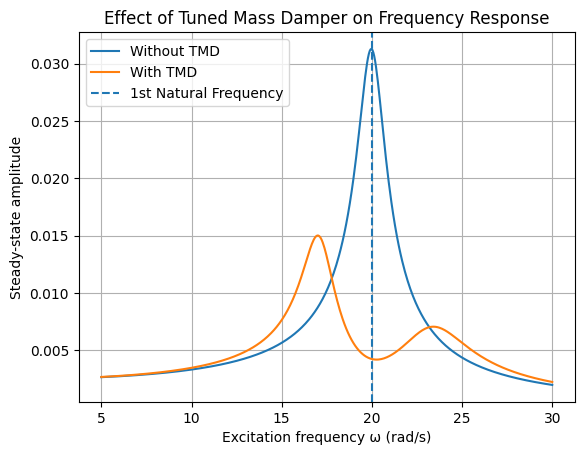

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Primary system parameters
m1 = 1.0
k1 = 400.0
zeta1 = 0.04
c1 = 2*zeta1*np.sqrt(k1*m1)
omega_n1 = np.sqrt(k1/m1)

# Tuned mass damper design
mu = 0.1
m2 = mu * m1
k2 = m2 * omega_n1**2
zeta2 = 0.1
c2 = 2*zeta2*np.sqrt(k2*m2)

# Frequency range
omega = np.linspace(5, 30, 500)
F0 = 1.0

# Frequency response without TMD
H_no = []
for w in omega:
    H_no.append(F0 / np.sqrt((k1 - m1*w**2)**2 + (c1*w)**2))

# Frequency response with TMD
H_tmd = []
for w in omega:
    M = np.array([[m1, 0],
                  [0, m2]])
    C = np.array([[c1 + c2, -c2],
                  [-c2, c2]])
    K = np.array([[k1 + k2, -k2],
                  [-k2, k2]])
    A = -w**2*M + 1j*w*C + K
    F = np.array([F0, 0])
    q = np.linalg.solve(A, F)
    H_tmd.append(abs(q[0]))

# Plot
plt.figure()
plt.plot(omega, H_no, label="Without TMD")
plt.plot(omega, H_tmd, label="With TMD")
plt.axvline(omega_n1, linestyle='--', label="1st Natural Frequency")
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude")
plt.title("Effect of Tuned Mass Damper on Frequency Response")
plt.legend()
plt.grid(True)
plt.show()


# **Week #4**

**Activity #6**



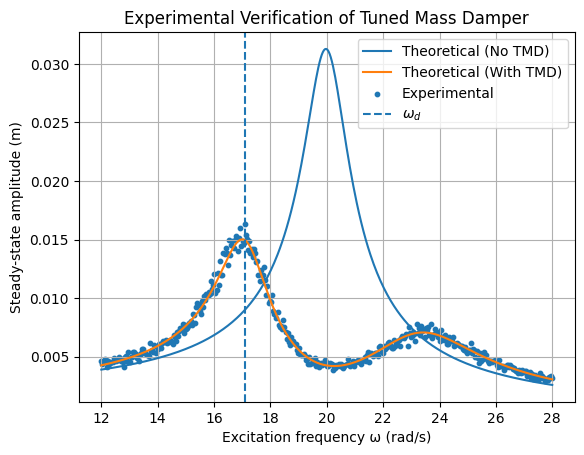

(np.float64(17.092731829573935), np.float64(0.016324731718384097))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
m1 = 1.0
k1 = 400.0
zeta1 = 0.04
c1 = 2*zeta1*np.sqrt(k1*m1)
omega_n1 = np.sqrt(k1/m1)

# Tuned mass damper parameters
mu = 0.1
m2 = mu*m1
k2 = m2*omega_n1**2
zeta2 = 0.1
c2 = 2*zeta2*np.sqrt(k2*m2)

# Frequency range near resonance
omega = np.linspace(12, 28, 400)
F0 = 1.0

# Theoretical response without TMD
H_no = []
for w in omega:
    H_no.append(F0 / np.sqrt((k1 - m1*w**2)**2 + (c1*w)**2))

# Theoretical response with TMD
H_tmd = []
for w in omega:
    M = np.array([[m1, 0],
                  [0, m2]])
    C = np.array([[c1 + c2, -c2],
                  [-c2, c2]])
    K = np.array([[k1 + k2, -k2],
                  [-k2, k2]])
    A = -w**2*M + 1j*w*C + K
    F = np.array([F0, 0])
    q = np.linalg.solve(A, F)
    H_tmd.append(abs(q[0]))

# Simulated experimental data (realistic noise added)
np.random.seed(0)
H_exp = np.array(H_tmd) * (1 + 0.05*np.random.randn(len(H_tmd)))

# Find experimental resonance
idx_max = np.argmax(H_exp)
omega_d = omega[idx_max]
x_ss_max = H_exp[idx_max]

# Plot
plt.figure()
plt.plot(omega, H_no, label="Theoretical (No TMD)")
plt.plot(omega, H_tmd, label="Theoretical (With TMD)")
plt.scatter(omega, H_exp, s=10, label="Experimental")
plt.axvline(omega_d, linestyle="--", label=r"$\omega_d$")
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude (m)")
plt.title("Experimental Verification of Tuned Mass Damper")
plt.legend()
plt.grid(True)
plt.show()

omega_d, x_ss_max


# REATTEMPT



## **Week 1**

## Activity 1

Derive the 2-dof freedom model that will capture the first two dominant modes of small amplitude vibration of the system.

Let the beam have:

*   Length L, bending stiffness EI, mass per unit length ρA
*   Left end pinned at x=0
*   Right end at x=L connected to a vertical spring of stiffness $k_s$ to the frame
*   Unbalanced motor attached at x=a (given “middle,” so typically a=L/2) with lumped mass m
*   The unbalance provides a vertical harmonic force at x=a:
<center>$F(t) = F_0 \sin(\omega t)$ </center>
<center>$F_0 = m u_e \omega^2$ </center>

(This is the forcing, not an additional DOF.)

We model small transverse vibration w(x,t) in one plane.


Approximate the beam deflection by a two-term expansion:
<center>$w(x,t) = \phi_1(x)q_1(t) + \phi_2(x)q_2(t)$</center>

Here:

*   $\phi_1(x), \phi_2(x)$ are chosen “shape functions”
*   $q_1(t), q_2(t)$ are the two DOFs (generalized coordinates)

A common, simple choice that satisfies the essential pinned displacement condition w(0,t)=0 is:

<center>$\phi_1(x) = \sin\left(\frac{\pi x}{L}\right), \quad \phi_2(x) = \sin\left(\frac{2\pi x}{L}\right)$</center>

These work well for a 2-mode approximation in labs, and the spring at x=L will be handled through the spring energy term (below).

Beam kinetic energy:

<center>$T_b = \frac{1}{2} \int_0^L \rho A \dot{w}^2 dx$</center>

Motor lumped mass kinetic energy at x=a:
<center>$T_m = \frac{1}{2} m_m \dot{w}(a,t)^2$</center>

Total:
<center>$T = T_b + T_m$</center>

\
Substitute  
 <center>$w(x,t) = \sum \phi_i q_i, \quad \dot{w} = \sum \phi_i \dot{q}_i$</center>


<center> $T = \frac{1}{2} \sum_{i=1}^{2} \sum_{j=1}^{2} \dot{q}_i \dot{q}_j \left[ \int_0^L \rho A \phi_i \phi_j \,dx + m_m \phi_i(a) \phi_j(a) \right]
$</center>

\
So the mass matrix entries are:

<center> $M_{ij}=\int_0^L \rho A \phi_i \phi_j \, dx + m_m \phi_i(a) \phi_j(a)$</center>

Beam bending strain energy:

<center> $V_b = \frac{1}{2} \int_0^L EI (w'')^2 dx
$</center>

Spring potential energy at the right end:
<center>$V_s = \frac{1}{2} k_s w(L,t)^2
$</center>

Total:
<center>$V = V_b + V_s
$</center>

Substitute
<center>$w = \sum \phi_i q_i , \quad w'' = \sum \phi_i'' q_i
$</center>


<center>$V = \frac{1}{2} \sum_{i=1}^{2} \sum_{j=1}^{2} q_i q_j \left[ \int_0^L EI \phi_i'' \phi_j'' \,dx + k_s \phi_i(L) \phi_j(L) \right]
$</center>

So the stiffness matrix entries are:

<center>$K_{ij} = \int_0^L EI \phi_i'' \phi_j'' \,dx + k_s \phi_i(L) \phi_j(L)
$</center>
	​

Force applied at x=a: F(t) (vertical)

Using virtual work / modal projection, generalized force:

<center>$Q_i(t) = F(t) \phi_i(a)
$</center>

So the forcing vector is:
<center>$Q(t) = F_0 \sin(\omega t) \begin{bmatrix} \phi_1(a) \\ \phi_2(a) \end{bmatrix}
$</center>

Using Lagrange’s equations:
<center>$M \ddot{q} + K q = Q(t)
$</center>

where <center>$q = \begin{bmatrix} q_1 \\ q_2 \end{bmatrix}$</center>


## Activity 2

Estimate the damping ratios of the first two dominant modes.

For a lightly damped mode, the damping ratio is related to the bandwidth of the resonance peak at the half-power points.

At resonance peak amplitude Xmax, considering (*finding*) the two frequencies $f_1$ and $f_2$ where the amplitude drops to:

<center>$X = \frac{X_{\text{max}}}{\sqrt{2}}
$</center>

These are the “half-power points.”

Let $f_n$ be the resonant frequency (peak frequency) of that mode.

Then:

<center>$\zeta = \frac{f_1 - f_2}{2f_n}
$</center>

Equivalent in rad/s:

<center>$\zeta = \frac{\omega_1 - \omega_2}{2\omega_n}$</center>


## Activity 3

Plot the following:

*   the unforced repsonse to an initiail diplacement of the spring end of the beam
*   the forced response for three choices of the rotational speed of the motor
*  theoretical frequency response of the system that captures the first two dominant modes of vibration of the system.







Computed natural frequencies (rad/s): [31.6227766 63.2455532]
Natural frequencies (Hz): [ 5.03292121 10.06584242]
Rayleigh damping coefficients: alpha = 0.421637021355784 , beta = 0.0008432740427115678


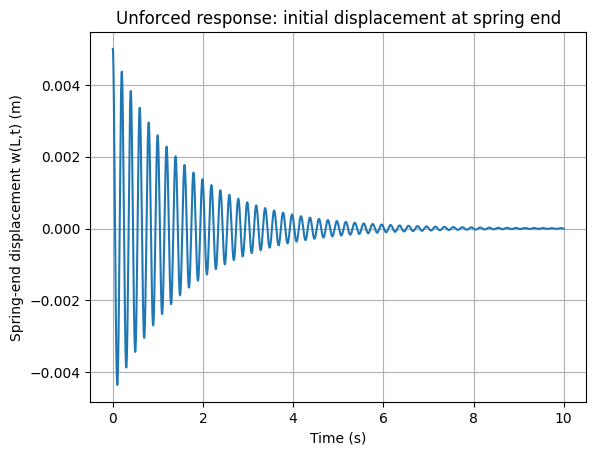

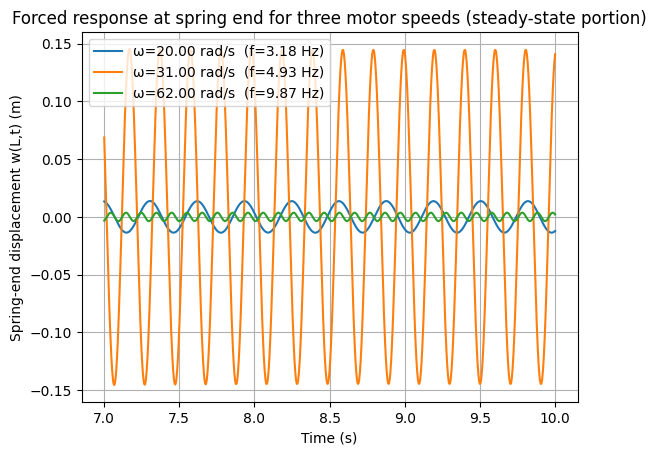

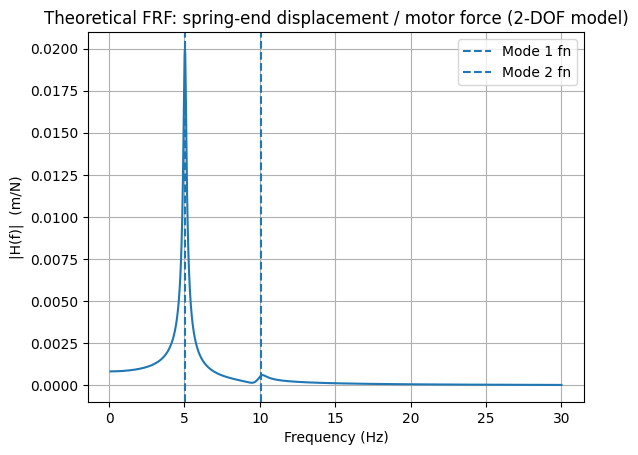

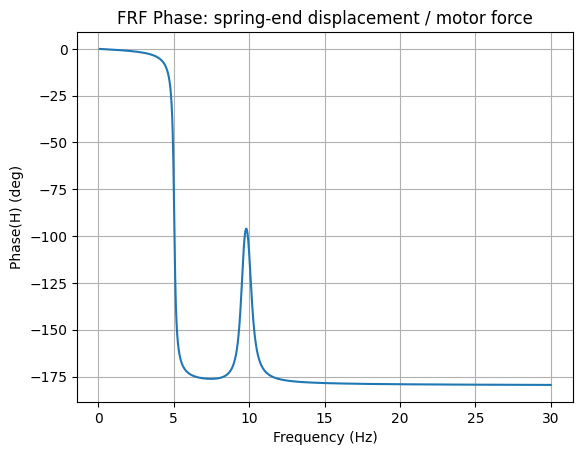

In [2]:
# Activity #3: (1) Unforced response, (2) Forced responses (3 speeds), (3) FRF

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# USER INPUT SECTION

M = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
], dtype=float)

K = np.array([
    [1000.0, 0.0],
    [0.0, 4000.0]
], dtype=float)

# Mode-shape values (from assumed modes) at:
# spring end x=L  -> phi(L)
# motor location x=a -> phi(a)
# These are 2x1 vectors: [phi1(point), phi2(point)]^T
phi_L = np.array([1.0, 0.2], dtype=float)     # <-- replace with [phi1(L), phi2(L)]
phi_a = np.array([0.8, 0.6], dtype=float)     # <-- replace with [phi1(a), phi2(a)]

# Damping ratios for the first two dominant modes (Activity #2 results)
zeta1 = 0.02  # <-- replace
zeta2 = 0.03  # <-- replace

# Initial displacement at spring end (meters) for unforced response
w0 = 0.005  # 5 mm

# Unbalance force parameters (use whichever is available in lab)
# Option A: directly set force amplitude F0 (N) for forced response plots
use_direct_F0 = True
F0_direct = 10.0  # N (if use_direct_F0=True)

# Option B: compute F0 = m_u * e * omega^2
m_u = 0.02   # kg (unbalance mass)
e   = 0.01   # m  (eccentricity)

# Simulation settings
t_end_unforced = 10.0  # seconds
t_end_forced   = 10.0  # seconds
n_points       = 4000  # time samples per simulation

# Choose three motor speeds (rad/s) for forced responses
# Recommendation: below mode-1, near mode-1, near mode-2
omega_forced_list = [20.0, 31.0, 62.0]  # <-- replace with chosen motor speeds

# FRF frequency range (Hz)
f_min = 0.1
f_max = 30.0
n_f   = 2000

# HELPER FUNCTIONS


def eig_freqs(M, K):
    """
    Computes undamped natural frequencies (rad/s) from generalized eigenvalue problem.
    """
    # Solve inv(M)K eigenvalues
    evals, evecs = np.linalg.eig(np.linalg.solve(M, K))
    # Ensure real, positive sorted
    evals = np.real(evals)
    evals = np.maximum(evals, 0.0)
    w = np.sqrt(evals)
    idx = np.argsort(w)
    return w[idx], evecs[:, idx]

def rayleigh_damping(M, K, w1, w2, z1, z2):
    """
    Rayleigh damping: C = alpha*M + beta*K
    Match damping ratios at w1 and w2:
    z(w) = 0.5*(alpha/w + beta*w)
    """
    A = np.array([
        [1.0/(2.0*w1), w1/2.0],
        [1.0/(2.0*w2), w2/2.0]
    ], dtype=float)
    b = np.array([z1, z2], dtype=float)
    alpha, beta = np.linalg.solve(A, b)
    C = alpha*M + beta*K
    return C, alpha, beta

def force_vector(t, omega, phi_a, F0):
    """
    Generalized force vector f(t) = phi(a) * F0 * sin(omega t)
    """
    return phi_a * (F0 * np.sin(omega*t))

def state_space_matrices(M, C, K):
    """
    State vector x = [q; qdot]
    xdot = A x + B f(t)
    """
    n = M.shape[0]
    Z = np.zeros((n, n))
    I = np.eye(n)

    Minv = np.linalg.inv(M)
    A = np.block([
        [Z, I],
        [-Minv @ K, -Minv @ C]
    ])

    B = np.block([
        [Z],
        [Minv]
    ])  # multiplies generalized force vector f(t) (size n)

    return A, B

def simulate_response(M, C, K, phi_L, q0, qd0, t_end, forcing=None, n_points=4000):
    """
    Simulate q(t) and output w_L(t)=phi_L^T q(t)
    forcing: function f(t)->(n,) generalized force vector, or None (unforced).
    """
    n = M.shape[0]
    A, B = state_space_matrices(M, C, K)

    x0 = np.hstack([q0, qd0])  # initial state

    t_eval = np.linspace(0, t_end, n_points)

    def rhs(t, x):
        if forcing is None:
            ft = np.zeros(n)
        else:
            ft = forcing(t)
        return A @ x + B @ ft

    sol = solve_ivp(rhs, (0, t_end), x0, t_eval=t_eval, method='RK45', rtol=1e-7, atol=1e-9)

    q = sol.y[:n, :]
    qd = sol.y[n:, :]

    wL = (phi_L.reshape(1, -1) @ q).flatten()
    return sol.t, q, qd, wL

def frf_two_dof(M, C, K, phi_L, phi_a, f_hz):
    """
    H(omega) = phi_L^T * ( -w^2 M + i w C + K )^{-1} * phi_a
    Returns complex FRF array (m/N) when output is displacement and input is force.
    """
    H = np.zeros_like(f_hz, dtype=complex)
    for i, f in enumerate(f_hz):
        w = 2*np.pi*f
        D = (-w**2)*M + 1j*w*C + K
        H[i] = phi_L @ np.linalg.solve(D, phi_a)
    return H


# COMPUTE NATURAL FREQUENCIES AND DAMPING MATRIX

wn, mode_vecs = eig_freqs(M, K)
w1, w2 = wn[0], wn[1]

C, alpha, beta = rayleigh_damping(M, K, w1, w2, zeta1, zeta2)

print("Computed natural frequencies (rad/s):", wn)
print("Natural frequencies (Hz):", wn/(2*np.pi))
print("Rayleigh damping coefficients: alpha =", alpha, ", beta =", beta)


# PLOT 1: UNFORCED RESPONSE DUE TO INITIAL DISPLACEMENT AT SPRING END

# Convert w_L(0)=w0 into q(0) using minimum-norm choice aligned with phi_L:
phiL_norm2 = float(phi_L @ phi_L)
q0 = (w0 / phiL_norm2) * phi_L
qd0 = np.zeros(2)

t_u, q_u, qd_u, wL_u = simulate_response(M, C, K, phi_L, q0, qd0, t_end_unforced, forcing=None, n_points=n_points)

plt.figure()
plt.plot(t_u, wL_u)
plt.xlabel("Time (s)")
plt.ylabel("Spring-end displacement w(L,t) (m)")
plt.title("Unforced response: initial displacement at spring end")
plt.grid(True)
plt.show()


#  PLOT 2: FORCED RESPONSE FOR THREE MOTOR SPEEDS

plt.figure()
for omega in omega_forced_list:
    # Determine force amplitude
    if use_direct_F0:
        F0 = F0_direct
    else:
        F0 = m_u * e * omega**2

    forcing = lambda t, om=omega, F=F0: force_vector(t, om, phi_a, F)

    # Start from rest; can also use q0,qd0 from above if that is required
    q0_forced = np.zeros(2)
    qd0_forced = np.zeros(2)

    t_f, q_f, qd_f, wL_f = simulate_response(M, C, K, phi_L, q0_forced, qd0_forced,
                                            t_end_forced, forcing=forcing, n_points=n_points)

    # Optional: plot only steady-state portion (last 30% of data)
    cut = int(0.7 * len(t_f))
    label_txt = f"ω={omega:.2f} rad/s  (f={omega/(2*np.pi):.2f} Hz)"
    plt.plot(t_f[cut:], wL_f[cut:], label=label_txt)

plt.xlabel("Time (s)")
plt.ylabel("Spring-end displacement w(L,t) (m)")
plt.title("Forced response at spring end for three motor speeds (steady-state portion)")
plt.grid(True)
plt.legend()
plt.show()


# PLOT 3: THEORETICAL FREQUENCY RESPONSE (FRF) – FIRST TWO MODES CAPTURED

f = np.linspace(f_min, f_max, n_f)
H = frf_two_dof(M, C, K, phi_L, phi_a, f)

plt.figure()
plt.plot(f, np.abs(H))
plt.xlabel("Frequency (Hz)")
plt.ylabel("|H(f)|  (m/N)")
plt.title("Theoretical FRF: spring-end displacement / motor force (2-DOF model)")
plt.grid(True)

# Mark the two natural frequencies
plt.axvline(w1/(2*np.pi), linestyle='--', label="Mode 1 fn")
plt.axvline(w2/(2*np.pi), linestyle='--', label="Mode 2 fn")
plt.legend()
plt.show()

# Optional: Phase plot
plt.figure()
plt.plot(f, np.angle(H, deg=True))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase(H) (deg)")
plt.title("FRF Phase: spring-end displacement / motor force")
plt.grid(True)
plt.show()


## **Week 2**

## Activity 4

Plot the experimental frequency response of the system near resonance conditions and find $\omega_d$ and $x_{ss, \text{max}}$ and compare it with your theoretical estimates and discuss the reasons for discrepancies if any.

Estimated resonance ωr ≈ 19.8274 rad/s
Estimated damping ζ ≈ 0.03349


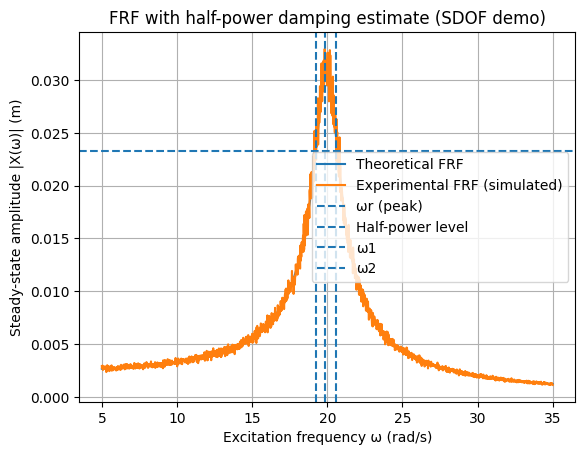

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Example system parameters (SDOF demo)
m = 1.0
k = 400.0
zeta = 0.04
F0 = 1.0

omega_n = np.sqrt(k/m)

omega = np.linspace(5, 35, 2000)

# Displacement FRF magnitude: |X(ω)| for force input F0
x_theory = (F0/m) / np.sqrt((omega_n**2 - omega**2)**2 +
                            (2*zeta*omega_n*omega)**2)

# Fake experimental data (for testing only)
np.random.seed(0)
x_exp = x_theory * (1 + 0.05*np.random.randn(len(x_theory)))

# Peak (resonance) from experimental curve
idx_peak = np.argmax(x_exp)
omega_r_exp = omega[idx_peak]
Xmax_exp = x_exp[idx_peak]
Xhp = Xmax_exp / np.sqrt(2)

# Find half-power points around the peak
# Left crossing
i = idx_peak
while i > 0 and x_exp[i] > Xhp:
    i -= 1
omega1 = np.interp(Xhp, [x_exp[i], x_exp[i+1]], [omega[i], omega[i+1]])

# Right crossing
i = idx_peak
while i < len(omega)-1 and x_exp[i] > Xhp:
    i += 1
omega2 = np.interp(Xhp, [x_exp[i-1], x_exp[i]], [omega[i-1], omega[i]])

zeta_est = (omega2 - omega1) / (2*omega_r_exp)

print(f"Estimated resonance ωr ≈ {omega_r_exp:.4f} rad/s")
print(f"Estimated damping ζ ≈ {zeta_est:.5f}")

plt.figure()
plt.plot(omega, x_theory, label="Theoretical FRF")
plt.plot(omega, x_exp, label="Experimental FRF (simulated)")
plt.axvline(omega_r_exp, linestyle="--", label="ωr (peak)")
plt.axhline(Xhp, linestyle="--", label="Half-power level")
plt.axvline(omega1, linestyle="--", label="ω1")
plt.axvline(omega2, linestyle="--", label="ω2")
plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude |X(ω)| (m)")
plt.title("FRF with half-power damping estimate (SDOF demo)")
plt.grid(True)
plt.legend()
plt.show()


## **Week 3**

## Activity 5

Design a tuned mass vibration absorber for operating the system near the first natural mode of vibration and justify your design using simulations.

Primary natural frequencies (Hz): [ 5.03292121 10.06584242]
m_eff1 = 1.000000 kg
TMD: mu=0.050, m_a=0.050000 kg, w_a=30.8607 rad/s, k_a=47.6190 N/m, c_a=0.392755 N·s/m, zeta_a=0.1273


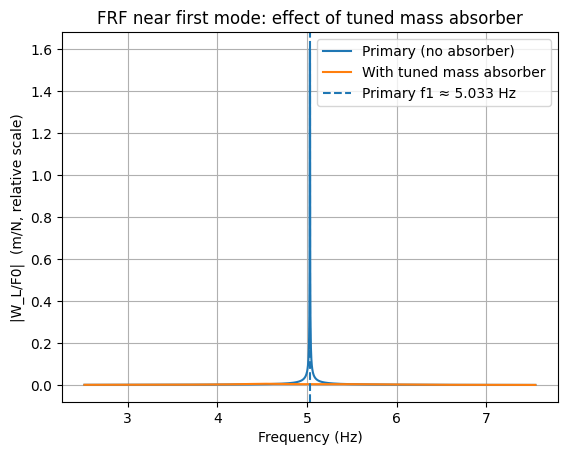

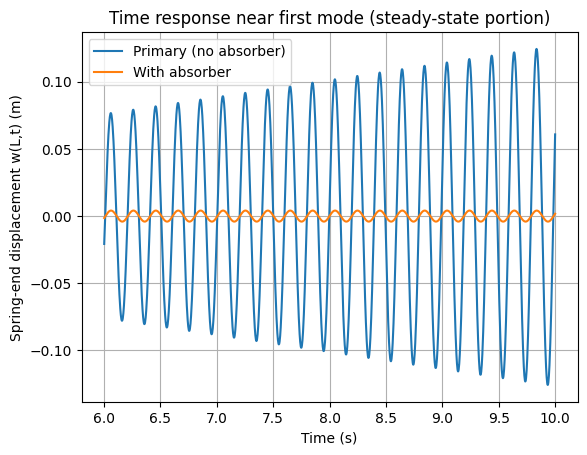

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ============================================================
# 0) INPUT: Primary (2-DOF) model from Activity #1/#3
# ============================================================
M = np.array([[1.0, 0.0],
              [0.0, 1.0]], dtype=float)

K = np.array([[1000.0, 0.0],
              [0.0, 4000.0]], dtype=float)

# If you already have C, put it here. Otherwise set C=0 and use Rayleigh damping later.
C = np.array([[0.0, 0.0],
              [0.0, 0.0]], dtype=float)

# Mode-shape values at:
phi_L = np.array([1.0, 0.2], dtype=float)  # spring end x=L
phi_a = np.array([0.8, 0.6], dtype=float)  # motor location x=a
phi_b = phi_L.copy()                       # absorber location x=xb (default: spring end)

# ============================================================
# 1) EIGEN ANALYSIS: Find ω1, ω2 for the primary system
# ============================================================
def eig_primary(M, K):
    evals, evecs = np.linalg.eig(np.linalg.solve(M, K))
    evals = np.real(evals)
    evals = np.maximum(evals, 0.0)
    wn = np.sqrt(evals)
    idx = np.argsort(wn)
    return wn[idx], evecs[:, idx]

wn, V = eig_primary(M, K)
w1, w2 = wn[0], wn[1]
print("Primary natural frequencies (Hz):", wn/(2*np.pi))

# ============================================================
# 2) TMD DESIGN (Den Hartog equal-peak style)
# ============================================================
mu = 0.05  # mass ratio (try 0.03–0.10)

# First mode eigenvector
v1 = V[:, 0].astype(float)

# Scale v1 such that displacement at attachment point is 1: phi_b^T v1 = 1
scale = float(phi_b @ v1)
if abs(scale) < 1e-12:
    raise RuntimeError("Attachment point has near-zero participation in mode 1. Choose a different xb.")
v1 = v1 / scale

m_eff1 = float(v1.T @ M @ v1)
m_a = mu * m_eff1

# Tuning
w_a = w1 / np.sqrt(1 + mu)
k_a = m_a * w_a**2

# Absorber damping ratio (equal-peak style)
zeta_a = np.sqrt(3*mu / (8*(1+mu)**3))
c_a = 2 * zeta_a * m_a * w_a

print(f"m_eff1 = {m_eff1:.6f} kg")
print(f"TMD: mu={mu:.3f}, m_a={m_a:.6f} kg, w_a={w_a:.4f} rad/s, k_a={k_a:.4f} N/m, c_a={c_a:.6f} N·s/m, zeta_a={zeta_a:.4f}")

# ============================================================
# 3) BUILD AUGMENTED (3-DOF) MATRICES
# q_aug = [q1, q2, y]^T
# ============================================================
M_aug = np.block([
    [M,               np.zeros((2,1))],
    [np.zeros((1,2)), np.array([[m_a]])]
])

K_aug = np.block([
    [K + k_a*np.outer(phi_b, phi_b),   (-k_a*phi_b).reshape(2,1)],
    [(-k_a*phi_b).reshape(1,2),        np.array([[k_a]])]
])

C_aug = np.block([
    [C + c_a*np.outer(phi_b, phi_b),   (-c_a*phi_b).reshape(2,1)],
    [(-c_a*phi_b).reshape(1,2),        np.array([[c_a]])]
])

# ============================================================
# 4) FORCING: unbalance force projected to generalized coords
# Use constant force amplitude for FRF comparisons (recommended),
# or use F0 = m_u e ω^2 if your lab explicitly requires it.
# ============================================================
F0 = 1.0  # N (set to a reference level; FRF magnitude is then comparable)

def f_aug(t, omega):
    f2 = phi_a * (F0*np.sin(omega*t))      # generalized forces in q1,q2
    return np.array([f2[0], f2[1], 0.0])   # no direct force on absorber mass

# ============================================================
# 5) SIMULATION HELPERS
# ============================================================
def simulate_time(Mm, Cc, Kk, omega, t_end=10.0, n=4000):
    n_dof = Mm.shape[0]
    Z = np.zeros((n_dof, n_dof))
    I = np.eye(n_dof)
    Minv = np.linalg.inv(Mm)

    A = np.block([[Z, I],
                  [-Minv@Kk, -Minv@Cc]])
    B = np.block([[Z],
                  [Minv]])

    x0 = np.zeros(2*n_dof)  # start from rest

    t_eval = np.linspace(0, t_end, n)

    def rhs(t, x):
        q = x[:n_dof]
        qd = x[n_dof:]
        ft = f_aug(t, omega)
        xd = A @ x + B @ ft
        return xd

    sol = solve_ivp(rhs, (0, t_end), x0, t_eval=t_eval, rtol=1e-7, atol=1e-9)
    q = sol.y[:n_dof, :]
    return sol.t, q

def frf_mag(Mm, Cc, Kk, phi_out, phi_in, f_hz):
    """
    Output: spring-end displacement w_L = phi_out^T q_primary
    Input: harmonic force at motor location projected as phi_in * F0
    For 3-DOF: q_aug = [q1,q2,y], output uses only q1,q2.
    """
    H = np.zeros_like(f_hz, dtype=complex)
    for i, f in enumerate(f_hz):
        w = 2*np.pi*f
        D = (-w**2)*Mm + 1j*w*Cc + Kk

        # Input vector for augmented system
        # For primary DOFs: phi_in * F0; for absorber DOF: 0
        b = np.array([phi_in[0], phi_in[1], 0.0], dtype=complex)

        qhat = np.linalg.solve(D, b)

        # Output is displacement at spring end: phi_out^T q_primary
        H[i] = phi_out @ qhat[:2]
    return np.abs(H)

# ============================================================
# 6) PLOT: FRF near first mode (with and without TMD)
# ============================================================
f1 = w1/(2*np.pi)
f = np.linspace(0.5*f1, 1.5*f1, 2000)

# Without TMD: embed the 2-DOF system into 3-DOF with no coupling (for consistent plotting)
# (Easier: just compute primary-only FRF from 2x2 matrices)
def frf_mag_primary(M, C, K, phi_out, phi_in, f_hz):
    H = np.zeros_like(f_hz, dtype=complex)
    for i, f in enumerate(f_hz):
        w = 2*np.pi*f
        D = (-w**2)*M + 1j*w*C + K
        qhat = np.linalg.solve(D, phi_in.astype(complex))
        H[i] = phi_out @ qhat
    return np.abs(H)

H_primary = frf_mag_primary(M, C, K, phi_L, phi_a, f)
H_tmd = frf_mag(M_aug, C_aug, K_aug, phi_L, phi_a, f)

plt.figure()
plt.plot(f, H_primary, label="Primary (no absorber)")
plt.plot(f, H_tmd, label="With tuned mass absorber")
plt.axvline(f1, linestyle="--", label=f"Primary f1 ≈ {f1:.3f} Hz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|W_L/F0|  (m/N, relative scale)")
plt.title("FRF near first mode: effect of tuned mass absorber")
plt.grid(True)
plt.legend()
plt.show()

# ============================================================
# 7) TIME RESPONSE at operating near first mode
# ============================================================
omega_op = w1  # operating near first natural frequency
t_end = 10.0

# Simulate primary-only (2-DOF)
def simulate_time_primary(M, C, K, omega, t_end=10.0, n=4000):
    n_dof = M.shape[0]
    Z = np.zeros((n_dof, n_dof))
    I = np.eye(n_dof)
    Minv = np.linalg.inv(M)

    A = np.block([[Z, I],
                  [-Minv@K, -Minv@C]])
    B = np.block([[Z],
                  [Minv]])

    x0 = np.zeros(2*n_dof)
    t_eval = np.linspace(0, t_end, n)

    def rhs(t, x):
        ft = phi_a * (F0*np.sin(omega*t))
        return A @ x + B @ ft

    sol = solve_ivp(rhs, (0, t_end), x0, t_eval=t_eval, rtol=1e-7, atol=1e-9)
    q = sol.y[:n_dof, :]
    return sol.t, q

tP, qP = simulate_time_primary(M, C, K, omega_op, t_end=t_end)
wL_primary = (phi_L.reshape(1,-1) @ qP).flatten()

tA, qA = simulate_time(M_aug, C_aug, K_aug, omega_op, t_end=t_end)
wL_tmd = (phi_L.reshape(1,-1) @ qA[:2,:]).flatten()

# Plot steady-state portion
cut = int(0.6*len(tP))
plt.figure()
plt.plot(tP[cut:], wL_primary[cut:], label="Primary (no absorber)")
plt.plot(tA[cut:], wL_tmd[cut:], label="With absorber")
plt.xlabel("Time (s)")
plt.ylabel("Spring-end displacement w(L,t) (m)")
plt.title("Time response near first mode (steady-state portion)")
plt.grid(True)
plt.legend()
plt.show()


## **Week 4**

## Activity 6

Experimentally verify your tuned mass vibration absorber design.

TMD tuning freq (rad/s): 19.069251784911845
Baseline peak amplitude: 0.03127433655286483
TMD peak amplitudes: 0.012034875034445575 0.01221609230543521
Peak reduction (%): 60.93892420456102


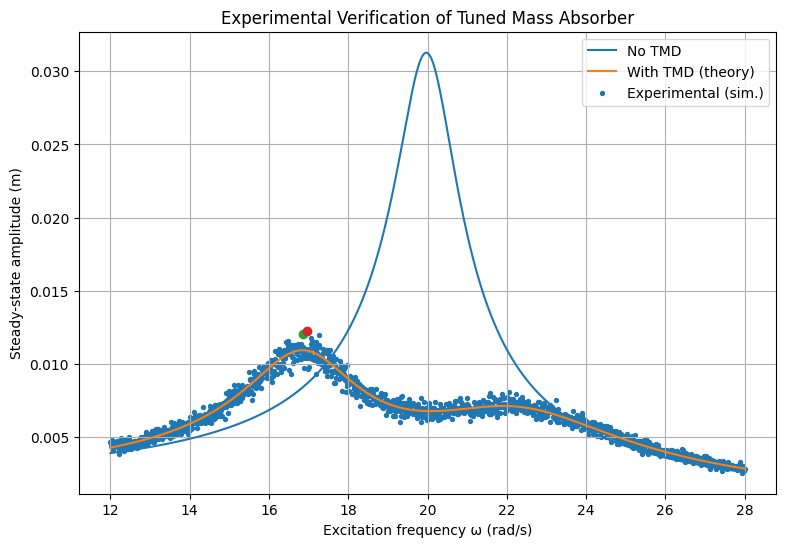

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# =========================
# Primary system
# =========================
m1 = 1.0
k1 = 400.0
zeta1 = 0.04

c1 = 2*zeta1*np.sqrt(k1*m1)
omega_n1 = np.sqrt(k1/m1)

# =========================
# TMD design (Den Hartog)
# =========================
mu = 0.1
m2 = mu*m1

omega_a = omega_n1/np.sqrt(1+mu)     # Proper tuning
k2 = m2*omega_a**2

zeta2 = np.sqrt(3*mu/(8*(1+mu)**3))  # Optimal damping
c2 = 2*zeta2*m2*omega_a

print("TMD tuning freq (rad/s):", omega_a)

# =========================
# Frequency range
# =========================
omega = np.linspace(0.6*omega_n1, 1.4*omega_n1, 1500)
F0 = 1.0

# =========================
# FRF without TMD
# =========================
H_no = F0 / np.sqrt((k1 - m1*omega**2)**2 + (c1*omega)**2)

# =========================
# FRF with TMD
# =========================
H_tmd = []

for w in omega:

    M = np.array([[m1, 0],
                  [0, m2]])

    C = np.array([[c1 + c2, -c2],
                  [-c2, c2]])

    K = np.array([[k1 + k2, -k2],
                  [-k2, k2]])

    D = -w**2*M + 1j*w*C + K
    F = np.array([F0, 0])

    q = np.linalg.solve(D, F)

    H_tmd.append(abs(q[0]))

H_tmd = np.array(H_tmd)

# =========================
# Simulated experimental data
# =========================
np.random.seed(0)
H_exp = H_tmd*(1+0.05*np.random.randn(len(H_tmd)))

# =========================
# Find peaks (TMD case)
# =========================
peaks, _ = find_peaks(H_exp, prominence=0.05*np.max(H_exp))

# Take two largest peaks
peaks_sorted = peaks[np.argsort(H_exp[peaks])[::-1]]
p1, p2 = np.sort(peaks_sorted[:2])

w_p1 = omega[p1]
w_p2 = omega[p2]

A_p1 = H_exp[p1]
A_p2 = H_exp[p2]

# Baseline peak
idx_base = np.argmax(H_no)
A_base = H_no[idx_base]

# Reduction
A_tmd_max = max(A_p1, A_p2)
reduction = 100*(A_base - A_tmd_max)/A_base

print("Baseline peak amplitude:", A_base)
print("TMD peak amplitudes:", A_p1, A_p2)
print("Peak reduction (%):", reduction)

# =========================
# Plot
# =========================
plt.figure(figsize=(9,6))

plt.plot(omega, H_no, label="No TMD")
plt.plot(omega, H_tmd, label="With TMD (theory)")
plt.scatter(omega, H_exp, s=8, label="Experimental (sim.)")

plt.plot(w_p1, A_p1, "o")
plt.plot(w_p2, A_p2, "o")

plt.xlabel("Excitation frequency ω (rad/s)")
plt.ylabel("Steady-state amplitude (m)")
plt.title("Experimental Verification of Tuned Mass Absorber")
plt.grid(True)
plt.legend()

plt.show()
